<a href="https://colab.research.google.com/github/xlnt415/StudyForBigdata/blob/main/Python/DeepLearning/TensorFlow/%EC%BA%A1%EC%8A%A4%ED%86%A4/%EC%95%8C%EC%95%BD%EB%B6%84%EB%A5%98%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
%matplotlib inline

import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 셋 준비하기

## 라벨 데이터 모으기

In [2]:
import os
import random
import shutil

# 데이터가 저장된 경로
data_path = "/content/drive/MyDrive/캡스톤 데이터/test_0316"

# 훈련 데이터의 비율 (0~1 사이 값)
train_ratio = 0.8

In [5]:
# 훈련 및 검증 데이터를 저장할 경로
train_path = "/content/drive/MyDrive/캡스톤 데이터/알약사진"
val_path_candy = "/content/drive/MyDrive/캡스톤 데이터/candy"
val_path_beats = "/content/drive/MyDrive/캡스톤 데이터/비즈"

In [6]:
# # 데이터를 저장할 디렉토리 생성
# os.makedirs(train_path, exist_ok=True)
# os.makedirs(val_path, exist_ok=True)

# # 데이터가 저장된 폴더에서 모든 파일 리스트를 가져옴
# file_list = os.listdir(data_path)

# # 파일 리스트를 섞음
# random.shuffle(file_list)

# # 훈련 데이터와 검증 데이터의 경계 인덱스 계산
# split_index = int(len(file_list) * train_ratio)

In [7]:
# #파일 이름 만드니깐 성공
# for i, file_name in enumerate(file_list):
#     if i < split_index:
#         # 검증 데이터로 이동
#         shutil.move(os.path.join(data_path, file_name), os.path.join(train_path, file_name))
#     else:
#         # 학습 데이터로 이동
#         shutil.move(os.path.join(data_path, file_name), os.path.join(val_path, file_name))

In [8]:
print(len(os.listdir(val_path_candy)))
print(len(os.listdir(val_path_beats)))

a = len(os.listdir(val_path_candy)) + len(os.listdir(val_path_beats))

print(a)

1501
1120
2621


In [ ]:
len(os.listdir(train_path))

In [10]:
len(os.listdir('/content/drive/MyDrive/캡스톤 데이터/data/train/notdrug'))

9525

In [6]:
import cv2
import numpy as np
import os
import glob

# 이미지 파일이 저장된 폴더 경로
folder_path = "/content/drive/MyDrive/캡스톤 데이터/data/val/notdrug"

# 폴더 내의 이미지 파일 경로 가져오기
img_paths = glob.glob(os.path.join(folder_path, '*'))

# 이미지 파일 증식을 위한 파라미터 설정
num_of_images = 3352  # 생성할 이미지 개수
width_shift_range = 0.1  # 가로 이동 범위
height_shift_range = 0.1  # 세로 이동 범위
rotation_range = 30  # 회전 각도 범위
i = 0
# 이미지 파일 증식
for img_path in img_paths:
    # 이미지 파일인 경우에만 증식
    if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
        # 이미지 파일 읽기
        img = cv2.imread(img_path)
        
        # 이미지 파일 증식
        for i in range(num_of_images):
            # 이미지 이동
            x_shift = np.random.uniform(-width_shift_range, width_shift_range) * img.shape[1]
            y_shift = np.random.uniform(-height_shift_range, height_shift_range) * img.shape[0]
            M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
            shifted_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
            
            # 이미지 회전
            angle = np.random.uniform(-rotation_range, rotation_range)
            center = (img.shape[1] / 2, img.shape[0] / 2)
            M = cv2.getRotationMatrix2D(center, angle, 1)
            rotated_img = cv2.warpAffine(shifted_img, M, (img.shape[1], img.shape[0]))
            
            # 이미지 저장
            new_img_path = os.path.splitext(img_path)[0] + "_augmented_" + str(i+1) + os.path.splitext(img_path)[1]
            cv2.imwrite(new_img_path, rotated_img)
            
            i += 1

            print(f'현재 남은 개수 : {num_of_images - i}개')

현재 남은 개수 : 298개
현재 남은 개수 : 297개
현재 남은 개수 : 296개
현재 남은 개수 : 295개
현재 남은 개수 : 294개
현재 남은 개수 : 293개
현재 남은 개수 : 292개
현재 남은 개수 : 291개
현재 남은 개수 : 290개
현재 남은 개수 : 289개
현재 남은 개수 : 288개
현재 남은 개수 : 287개
현재 남은 개수 : 286개
현재 남은 개수 : 285개
현재 남은 개수 : 284개
현재 남은 개수 : 283개
현재 남은 개수 : 282개
현재 남은 개수 : 281개
현재 남은 개수 : 280개
현재 남은 개수 : 279개
현재 남은 개수 : 278개
현재 남은 개수 : 277개
현재 남은 개수 : 276개
현재 남은 개수 : 275개
현재 남은 개수 : 274개
현재 남은 개수 : 273개
현재 남은 개수 : 272개
현재 남은 개수 : 271개
현재 남은 개수 : 270개
현재 남은 개수 : 269개
현재 남은 개수 : 268개
현재 남은 개수 : 267개
현재 남은 개수 : 266개
현재 남은 개수 : 265개
현재 남은 개수 : 264개
현재 남은 개수 : 263개
현재 남은 개수 : 262개
현재 남은 개수 : 261개
현재 남은 개수 : 260개
현재 남은 개수 : 259개
현재 남은 개수 : 258개
현재 남은 개수 : 257개
현재 남은 개수 : 256개
현재 남은 개수 : 255개
현재 남은 개수 : 254개
현재 남은 개수 : 253개
현재 남은 개수 : 252개
현재 남은 개수 : 251개
현재 남은 개수 : 250개
현재 남은 개수 : 249개
현재 남은 개수 : 248개
현재 남은 개수 : 247개
현재 남은 개수 : 246개
현재 남은 개수 : 245개
현재 남은 개수 : 244개
현재 남은 개수 : 243개
현재 남은 개수 : 242개
현재 남은 개수 : 241개
현재 남은 개수 : 240개
현재 남은 개수 : 239개
현재 남은 개수 : 238개
현재 남은 개수 : 237개
현재 남은 개수

KeyboardInterrupt: ignored

In [10]:
# img_test = cv2.imread("/content/drive/MyDrive/캡스톤 데이터/test/train/1M_4NHfUrXd.jpg")

# # 데이터 타입을 float로 변경하기
# img_test = img_test.astype(np.float32) / 255.
# print(img_test.shape)

(426, 780, 3)


## train dataest

In [11]:
batch_size = 32
file_list = os.listdir(train_path)
num_images = len(file_list)
num_batches = num_images // batch_size + (num_images % batch_size != 0)

batch_images = []

for batch_idx in range(num_batches):
    batch_start = batch_idx * batch_size
    batch_end = min(batch_start + batch_size, num_images)
    batch_files = file_list[batch_start:batch_end]
    
    for filename in batch_files:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(train_path, filename)
            img_array = cv2.imread(file_path)
            
            if img_array is None:
                pass

            elif not img_array.size:
                pass

            else:
                img_array = cv2.resize(img_array, (128, 128))
            
            if img_array is not None:
                img_array = img_array.astype(np.float32)
                batch_images.append(img_array)
    
            if len(batch_images) == a:
                break
    
datasets = np.stack(batch_images)

In [12]:
train = datasets.copy()

In [13]:
len(datasets)

4181

In [14]:
datasets

array([[[[225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.],
         ...,
         [225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.]],

        [[225., 206., 191.],
         [225., 206., 191.],
         [227., 208., 193.],
         ...,
         [225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.]],

        [[225., 206., 191.],
         [225., 206., 191.],
         [223., 204., 189.],
         ...,
         [225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.]],

        ...,

        [[225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.],
         ...,
         [225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.]],

        [[225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.],
         ...,
         [225., 206., 191.],
         [225., 206., 191.],
         [225., 206., 191.]],

        [[225., 206., 191.],
       

In [15]:
# test_train = datasets[ : int(len(datasets) * 0.7 )]
# test_val = datasets[ int(len(datasets) * 0.7) : ]
# # test_val = datasets[len(datasets) /2 : ]
# print(len(test_train))
# print(len(test_val))

In [16]:
# test_train = np.delete(test_train, 1, axis = 0)
# (test_train.shape)

In [ ]:
#@title
# #@title
# batch_size = 32

# file_list = os.listdir(val_path_candy)
# num_images = len(file_list)
# num_batches = num_images // batch_size + (num_images % batch_size != 0)

# batch_images = []

# for batch_idx in range(num_batches):
#     batch_start = batch_idx * batch_size
#     batch_end = min(batch_start + batch_size, num_images)
#     batch_files = file_list[batch_start:batch_end]
    
#     for filename in batch_files:
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             file_path = os.path.join(val_path_candy, filename)
#             img_array = cv2.imread(file_path)
#             img_array = cv2.resize(img_array, (128, 128))
      
#             img_array = img_array.astype(np.float32)
#             batch_images.append(img_array)
    
# train_data = np.stack(batch_images)


# batch_size = 32

# file_list = os.listdir(val_path_beats)
# num_images = len(file_list)
# num_batches = num_images // batch_size + (num_images % batch_size != 0)

# batch_images = []

# for batch_idx in range(num_batches):
#     batch_start = batch_idx * batch_size
#     batch_end = min(batch_start + batch_size, num_images)
#     batch_files = file_list[batch_start:batch_end]
    
#     for filename in batch_files:
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             file_path = os.path.join(val_path_beats, filename)
#             img_array = cv2.imread(file_path)
#             img_array = cv2.resize(img_array, (128, 128))
      
#             img_array = img_array.astype(np.float32)
#             batch_images.append(img_array)
    
# train_data = np.stack(batch_images)


In [18]:
def load_images_from_dir(val_path):
    file_list = os.listdir(val_path)
    num_images = len(file_list)
    num_batches = num_images // batch_size + (num_images % batch_size != 0)

    batch_images = []

    for batch_idx in range(num_batches):
        batch_start = batch_idx * batch_size
        batch_end = min(batch_start + batch_size, num_images)
        batch_files = file_list[batch_start:batch_end]

        for filename in batch_files:
            # if filename.endswith(".jpg") or filename.endswith(".png"):
            #     file_path = os.path.join(val_path, filename)
            #     img_array = cv2.imread(file_path)
            #     img_array = cv2.resize(img_array, (128, 128))
            #     img_array = img_array.astype(np.float32)
            #     batch_images.append(img_array)

            if filename.endswith(".jpg") or filename.endswith(".png"):
                        file_path = os.path.join(val_path, filename)
                        img_array = cv2.imread(file_path)
                        
                        if img_array is None:
                            pass

                        elif not img_array.size:
                            pass

                        else:
                            img_array = cv2.resize(img_array, (128, 128))
                        
                        if img_array is not None:
                            img_array = img_array.astype(np.float32)
                            batch_images.append(img_array)
    
    return np.stack(batch_images)

batch_size = 32
val_path_candy = "/content/drive/MyDrive/캡스톤 데이터/candy"
val_path_beats = "/content/drive/MyDrive/캡스톤 데이터/비즈"

train_data_candy = load_images_from_dir(val_path_candy)
train_data_beats = load_images_from_dir(val_path_beats)


In [19]:
print(len(train_data_candy))
print(len(train_data_beats))
print(len(datasets))

1499
1119
4181


In [ ]:
print(type(train_data_candy))
print(type(train_data_beats))

In [ ]:
print(train_data_candy.shape)
print(train_data_beats.shape)

In [20]:
# 두 배열 중 작은 차원의 크기에 맞춰 다른 배열의 차원을 잘라냄
min_dim = min(train_data_candy.shape[0], train_data_beats.shape[0])
array1 = train_data_candy[:min_dim]
array2 = train_data_beats[:min_dim]

# 두 배열을 수평 방향으로 결합
val = np.concatenate((array1, array2), axis=0)

In [21]:
print(type(val))
print(val.shape)

<class 'numpy.ndarray'>
(2238, 128, 128, 3)


In [22]:
# 좌우 반전하여 데이터 증식
img_flipped = np.flip(val, axis=1)

# 증식된 이미지 array 결합
val_2 = np.concatenate((val, img_flipped), axis=0)

In [23]:
val_2.shape

(4476, 128, 128, 3)

In [24]:
train.shape

(4181, 128, 128, 3)

In [25]:
array_length = train.shape[0]

# 랜덤한 인덱스 100개 추출
random_indices = np.random.choice(array_length, size=val_2.shape[0] - train.shape[0], replace=False)

# 랜덤하게 추출한 이미지 array
random_images = train[random_indices]

In [26]:
# 좌우 반전하여 데이터 증식
img_flipped = np.flip(random_images, axis=1)

# 증식된 이미지 array 결합
train_2 = np.concatenate((train, img_flipped), axis=0)

In [27]:
train_2.shape

(4476, 128, 128, 3)

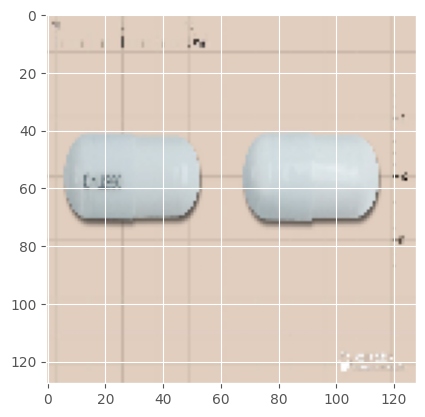

In [28]:
train_test = train_2 / 255.0 # 해줘야 나옴
plt.imshow(train_test[10])
plt.show()

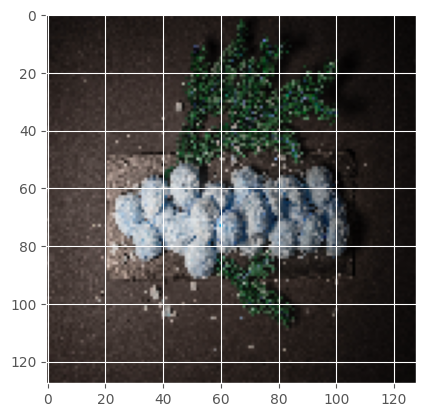

In [30]:
val_test = val_2 / 255.0 # 해줘야 나옴
plt.imshow(val_test[10])
plt.show()

## val datasets

In [ ]:
#@title
# batch_size = 32
# file_list = os.listdir(val_path)
# num_images = len(file_list)
# num_batches = num_images // batch_size + (num_images % batch_size != 0)

# batch_images = []

# for batch_idx in range(num_batches):
#     batch_start = batch_idx * batch_size
#     batch_end = min(batch_start + batch_size, num_images)
#     batch_files = file_list[batch_start:batch_end]
    
#     for filename in batch_files:
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             file_path = os.path.join(val_path, filename)
#             img_array = cv2.imread(file_path)
#             img_array = cv2.resize(img_array, (128, 128))
      
#             img_array = img_array.astype(np.float32)
#             batch_images.append(img_array)
    
# val_data = np.stack(batch_images)

In [ ]:
#@title
# print(type(val_data))
# print(val_data.shape)

In [ ]:
#@title
# val_test = val_data / 255.0 # 해줘야 나옴
# plt.imshow(val_test[7])
# plt.show()

In [ ]:
#@title
print(type(datasets))
print(datasets.shape)

# Builidng the model

In [31]:
x_train,  x_val= train_test_split(train_2,
                                                  test_size=0.2) 

In [96]:
x_train = x_train / 255.
x_val = x_val / 255.

In [37]:
y_train,  y_val= train_test_split(val_2,
                                                  test_size=0.2) 

In [101]:
y_train = y_train / 255.
y_val = y_val / 255.0

In [102]:
print(f'학습 데이터: {x_train.shape}\t레이블 {y_train.shape}')
print(f'검증 데이터: {x_val.shape}\t레이블 {y_val.shape}')

학습 데이터: (3580, 128, 128, 3)	레이블 (3580, 128, 128, 3)
검증 데이터: (896, 128, 128, 3)	레이블 (896, 128, 128, 3)


In [ ]:
# x_train = x_train / 255.
# x_val = x_val / 255.


# # 이것도 아님
# y_train = to_categorical(y_test)
# y_val = to_categorical(y_val)

In [60]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D, Dropout, Reshape

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [103]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [104]:
# model.compile(optimizer = 'adam',
#               loss = 'binary_crossentropy',
#               metrics = ['acc'])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [105]:
hist = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/10


ValueError: ignored

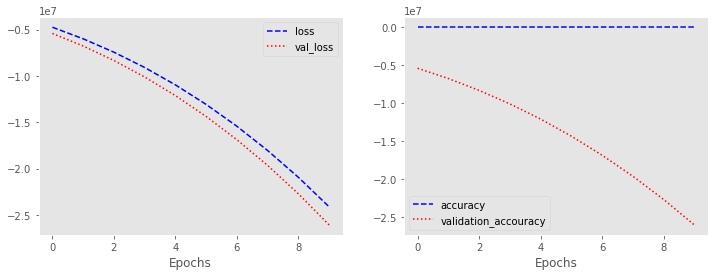

In [ ]:
hist.history.keys()

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b--', label = 'loss')
plt.plot(hist.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], 'b--', label = 'accuracy')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation_accouracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [75]:
img_shape = (128, 128, 3)

In [76]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape, include_top=False, weights="imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [77]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [78]:
base_model.trainable = False

In [79]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 1280) dtype=float32 (created by layer 'out_relu')>

In [80]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [81]:
global_average_layer

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [82]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)

In [83]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [84]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [85]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [89]:
train_generator = data_gen_train(data = train_2, target_size=(128,128), batch_size=128, class_mode="binary")
valid_generator = data_gen_train(data = val_2, target_size=(128,128), batch_size=128, class_mode="binary")

TypeError: ignored